In [121]:
#!pip install xlrd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

Import Excel files

In [122]:
CustomerDemographic_df = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name ="CustomerDemographic",skiprows= 1)
CustomerDemographic_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [123]:
CustomerAddress_df = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name ="CustomerAddress",skiprows= 1)
CustomerAddress_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [124]:
Transactions_df = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name ="Transactions",skiprows= 1)
Transactions_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-10
1,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,2008-03-19
2,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21
3,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,2003-09-09
4,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09


In [125]:
NewCustomerList_df = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name ="NewCustomerList",skiprows= 1)
NewCustomerList_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.70,0.8750,1.09375,0.929688,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.61,0.6100,0.76250,0.648125,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.92,0.9200,0.92000,0.920000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.57,0.7125,0.71250,0.712500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.97,0.9700,1.21250,1.212500,4,4,1.703125


# Cutomer demographic data set

In [126]:
CustomerDemographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 406.4+ KB


In [127]:
df1 = CustomerDemographic_df

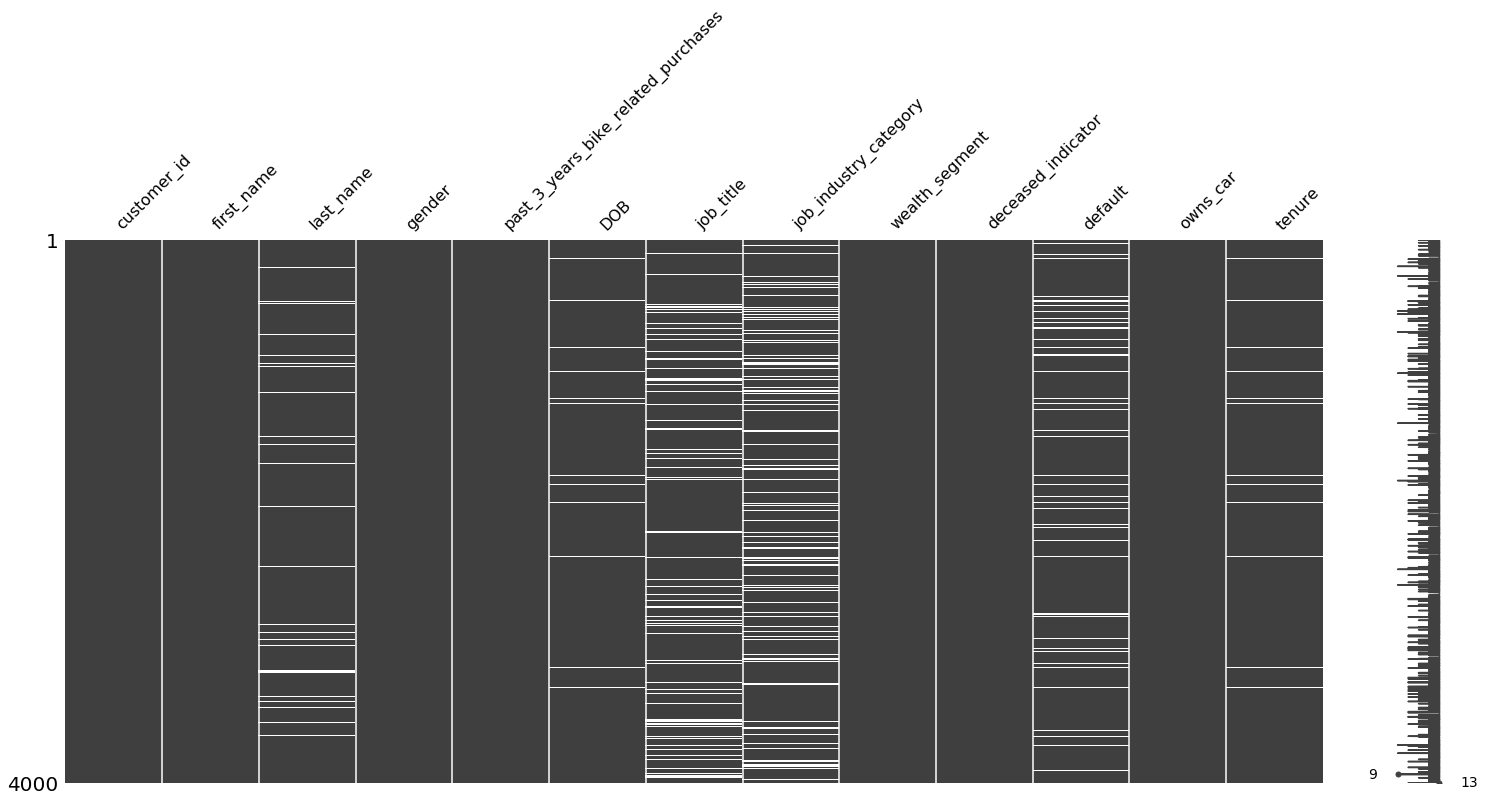

In [128]:
msno.matrix(CustomerDemographic_df) 

## All values in Customer id is unique

In [129]:
pd.Series(CustomerDemographic_df["customer_id"]).is_unique

True

## 125 Miising values in last name column

In [130]:
CustomerDemographic_lastname_miss = CustomerDemographic_df[CustomerDemographic_df['last_name'].isnull()]
CustomerDemographic_lastname_miss.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
66,67,Vernon,NaN,Male,67,1960-06-14,Web Developer II,Retail,Mass Customer,N,<svg><script>0<1>alert('XSS')</script>,No,18.0
105,106,Glyn,NaN,Male,54,1966-07-03,Software Test Engineer III,Health,High Net Worth,N,ãã¼ãã£ã¼ã¸è¡ããªãã,Yes,18.0
138,139,Gar,NaN,Male,1,1964-07-28,Operator,Telecommunications,Affluent Customer,N,-100,No,4.0
196,197,Avis,NaN,Female,32,1977-01-27,NaN,NaN,High Net Worth,N,NaN,No,5.0


In [131]:
dups = CustomerDemographic_lastname_miss.pivot_table(index = ['first_name'], aggfunc ='size').to_frame(name = 'dup_count').reset_index()
dups.loc[dups['dup_count'] == 2]

,first_name,dup_count
21,Corabelle,2
78,Lorettalorna,2


In [132]:
duplicate_rows_df = CustomerDemographic_lastname_miss[CustomerDemographic_lastname_miss.duplicated(['first_name'])]
duplicate_rows_df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1350,1351,Lorettalorna,NaN,U,32,NaT,Office Assistant IV,IT,High Net Worth,N,NaN,No,NaN
1904,1905,Corabelle,NaN,Female,21,1953-09-17,Help Desk Technician,Manufacturing,Affluent Customer,N,00ËÆ$-,No,15.0


## replaced NAN with '-' in last name column

In [133]:
CustomerDemographic_df["last_name"].fillna("-", inplace = True) 
CustomerDemographic_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,-,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


## Gender

In [134]:
CustomerDemographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              4000 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 406.4+ KB


In [135]:
CustomerDemographic_df['gender'].value_counts()

Female    2037
Male      1872
U           88
M            1
F            1
Femal        1
Name: gender, dtype: int64

In [136]:
CustomerDemographic_df['gender'] = CustomerDemographic_df['gender'].replace('Female', 'F')
CustomerDemographic_df['gender'] = CustomerDemographic_df['gender'].replace('Femal', 'F')
CustomerDemographic_df['gender'] = CustomerDemographic_df['gender'].replace('Male', 'M')

In [137]:
CustomerDemographic_df['gender'].value_counts()

F    2039
M    1873
U      88
Name: gender, dtype: int64

In [138]:
CustomerDemographic_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,-,M,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


## Removed the rows (87) having NULL value in DOB coulmn
## Age based on DOB, All DOB is valid values

In [139]:
today = pd.Timestamp('now')
CustomerDemographic_df = CustomerDemographic_df.dropna(axis=0, subset=['DOB'])
CustomerDemographic_df.loc[CustomerDemographic_df['DOB'] >= today]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure


## Calculated Age using DOB value

In [140]:
CustomerDemographic_df['Age'] = (today - CustomerDemographic_df['DOB']).astype('<m8[Y]')
CustomerDemographic_df.head()

c:\users\subas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,67.0
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,40.0
2,3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,67.0
3,4,Talbot,-,M,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,59.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,43.0


In [141]:
CustomerDemographic_df = CustomerDemographic_df.sort_values(by ='Age' )
CustomerDemographic_df.tail()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Age
2412,2413,Abbey,Murrow,M,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0,77.0
3409,3410,Merrili,Brittin,F,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16.0,80.0
1091,1092,Katlin,Creddon,F,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0,85.0
719,720,Darrel,Canet,M,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0,89.0
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0,177.0


## Removed Outlier record - Age of the customer (176) is an outlier

In [142]:
CustomerDemographic_df = CustomerDemographic_df[CustomerDemographic_df.Age < 100]
CustomerDemographic_df.tail()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Age
657,658,Donn,Bonnell,M,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,Yes,8.0,77.0
2412,2413,Abbey,Murrow,M,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0,77.0
3409,3410,Merrili,Brittin,F,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16.0,80.0
1091,1092,Katlin,Creddon,F,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0,85.0
719,720,Darrel,Canet,M,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0,89.0


In [143]:
CustomerDemographic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3912 entries, 65 to 719
Data columns (total 14 columns):
customer_id                            3912 non-null int64
first_name                             3912 non-null object
last_name                              3912 non-null object
gender                                 3912 non-null object
past_3_years_bike_related_purchases    3912 non-null int64
DOB                                    3912 non-null datetime64[ns]
job_title                              3415 non-null object
job_industry_category                  3256 non-null object
wealth_segment                         3912 non-null object
deceased_indicator                     3912 non-null object
default                                3698 non-null object
owns_car                               3912 non-null object
tenure                                 3912 non-null float64
Age                                    3912 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(

## Job Title having more unique values and 506 Null values

In [144]:
CustomerDemographic_df['job_title'].value_counts()

Tax Accountant                          43
Business Systems Development Analyst    43
Social Worker                           42
Recruiting Manager                      41
Internal Auditor                        40
                                        ..
Database Administrator II                4
Health Coach III                         3
Health Coach I                           3
Research Assistant III                   3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

## Removed records if job title is null

In [145]:
CustomerDemographic_df = CustomerDemographic_df[CustomerDemographic_df.job_title.notnull()]
CustomerDemographic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3415 entries, 65 to 719
Data columns (total 14 columns):
customer_id                            3415 non-null int64
first_name                             3415 non-null object
last_name                              3415 non-null object
gender                                 3415 non-null object
past_3_years_bike_related_purchases    3415 non-null int64
DOB                                    3415 non-null datetime64[ns]
job_title                              3415 non-null object
job_industry_category                  2864 non-null object
wealth_segment                         3415 non-null object
deceased_indicator                     3415 non-null object
default                                3237 non-null object
owns_car                               3415 non-null object
tenure                                 3415 non-null float64
Age                                    3415 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(

## Job_industry_category and wealth_segment has less unique values which can be used as factor and 656 Null values

In [146]:
CustomerDemographic_df['job_industry_category'].value_counts()

Manufacturing         695
Financial Services    682
Health                543
Retail                305
Property              231
IT                    126
Entertainment         122
Argiculture            99
Telecommunications     61
Name: job_industry_category, dtype: int64

## wealth_segment less unique values which can be used as factor and no Null values

In [147]:
CustomerDemographic_df['wealth_segment'].value_counts()

Mass Customer        1695
High Net Worth        871
Affluent Customer     849
Name: wealth_segment, dtype: int64

In [148]:
CustomerDemographic_df['deceased_indicator'].value_counts()

N    3413
Y       2
Name: deceased_indicator, dtype: int64

## Removed deceased customer records

In [149]:
CustomerDemographic_df = CustomerDemographic_df[CustomerDemographic_df.deceased_indicator <= 'N']
CustomerDemographic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3413 entries, 65 to 719
Data columns (total 14 columns):
customer_id                            3413 non-null int64
first_name                             3413 non-null object
last_name                              3413 non-null object
gender                                 3413 non-null object
past_3_years_bike_related_purchases    3413 non-null int64
DOB                                    3413 non-null datetime64[ns]
job_title                              3413 non-null object
job_industry_category                  2862 non-null object
wealth_segment                         3413 non-null object
deceased_indicator                     3413 non-null object
default                                3235 non-null object
owns_car                               3413 non-null object
tenure                                 3413 non-null float64
Age                                    3413 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(

In [150]:
CustomerDemographic_df['owns_car'].value_counts()

Yes    1732
No     1681
Name: owns_car, dtype: int64

## Deleted Default column from Customer Demographic dataset

In [151]:
del CustomerDemographic_df['default']

In [152]:
CustomerDemographic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3413 entries, 65 to 719
Data columns (total 13 columns):
customer_id                            3413 non-null int64
first_name                             3413 non-null object
last_name                              3413 non-null object
gender                                 3413 non-null object
past_3_years_bike_related_purchases    3413 non-null int64
DOB                                    3413 non-null datetime64[ns]
job_title                              3413 non-null object
job_industry_category                  2862 non-null object
wealth_segment                         3413 non-null object
deceased_indicator                     3413 non-null object
owns_car                               3413 non-null object
tenure                                 3413 non-null float64
Age                                    3413 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 373.3+ KB


# Customer Address dataset

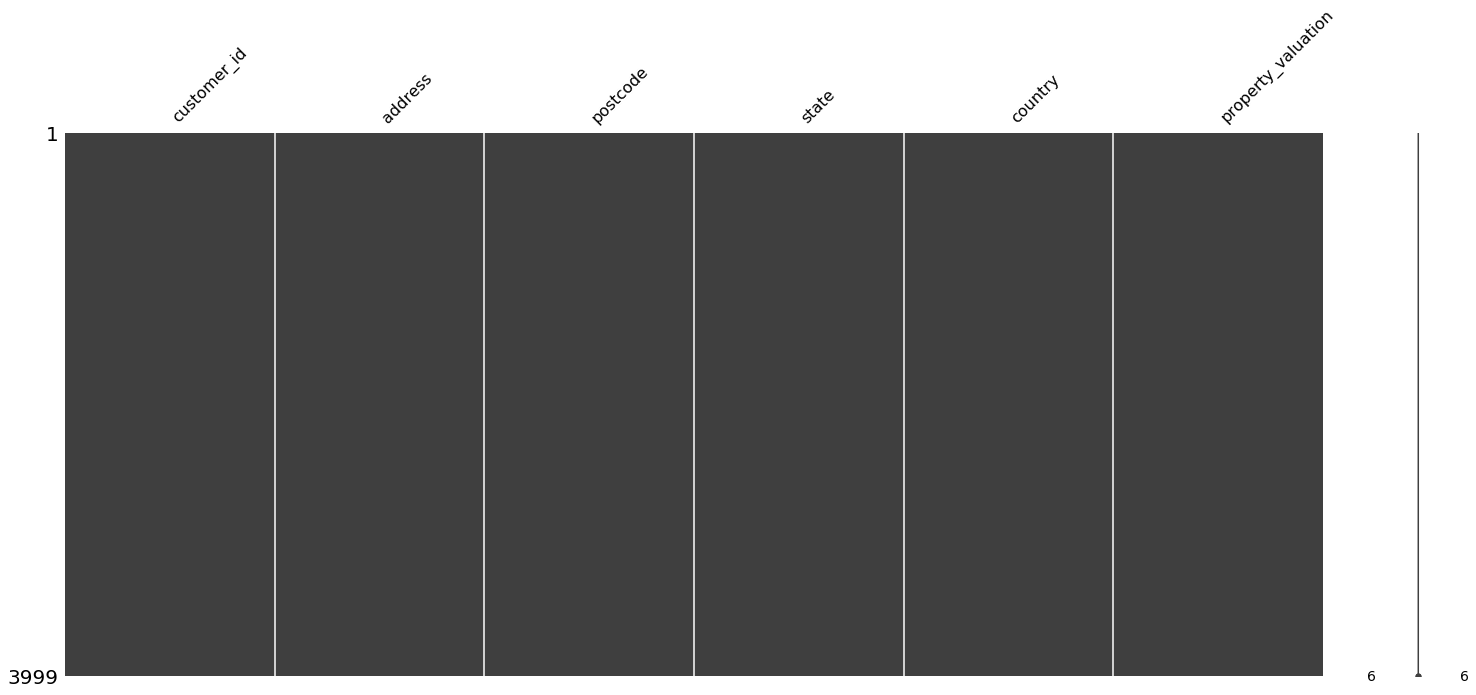

In [153]:
msno.matrix(CustomerAddress_df) 

In [154]:
CustomerAddress_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
customer_id           3999 non-null int64
address               3999 non-null object
postcode              3999 non-null int64
state                 3999 non-null object
country               3999 non-null object
property_valuation    3999 non-null int64
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [155]:
pd.Series(CustomerAddress_df["customer_id"]).is_unique

True

## Replaced 'New South Wales' as 'NSW and 'Victoria' as 'VIC'

In [156]:
CustomerAddress_df['state'] = CustomerAddress_df['state'].replace('New South Wales', 'NSW')
CustomerAddress_df['state'] = CustomerAddress_df['state'].replace('Victoria', 'VIC')
CustomerAddress_df['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

## spit address column into number and street name

In [157]:
CustomerAddress_df[["number","street"]] = CustomerAddress_df.address.str.extract('(?P<number>\d+) (?P<street>.+)',expand=True)
CustomerAddress_df.head()

,customer_id,address,postcode,state,country,property_valuation,number,street
0,1,060 Morning Avenue,2016,NSW,Australia,10,060,Morning Avenue
1,2,6 Meadow Vale Court,2153,NSW,Australia,10,6,Meadow Vale Court
2,4,0 Holy Cross Court,4211,QLD,Australia,9,0,Holy Cross Court
3,5,17979 Del Mar Point,2448,NSW,Australia,4,17979,Del Mar Point
4,6,9 Oakridge Court,3216,VIC,Australia,9,9,Oakridge Court


In [158]:
CustomerAddress_df["number"] = CustomerAddress_df["number"].astype(int)

In [159]:
CustomerAddress_df['country'].value_counts()

Australia    3999
Name: country, dtype: int64

# Transaction dataset

In [160]:
Transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(3), object(5)
memory usage: 2.0+ MB


In [161]:
Transactions_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-10
1,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,2008-03-19
2,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21
3,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,2003-09-09
4,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09


In [162]:
Transactions_df = Transactions_df.dropna(axis=0, subset=['online_order'])
Transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19640 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             19640 non-null int64
product_id                 19640 non-null int64
customer_id                19640 non-null int64
transaction_date           19640 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               19640 non-null object
brand                      19445 non-null object
product_line               19445 non-null object
product_class              19445 non-null object
product_size               19445 non-null object
list_price                 19640 non-null float64
standard_cost              19445 non-null float64
product_first_sold_date    19445 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(3), object(5)
memory usage: 2.1+ MB


In [163]:
Transactions_df = Transactions_df.dropna(axis=0, subset=['brand'])
Transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             19445 non-null int64
product_id                 19445 non-null int64
customer_id                19445 non-null int64
transaction_date           19445 non-null datetime64[ns]
online_order               19445 non-null float64
order_status               19445 non-null object
brand                      19445 non-null object
product_line               19445 non-null object
product_class              19445 non-null object
product_size               19445 non-null object
list_price                 19445 non-null float64
standard_cost              19445 non-null float64
product_first_sold_date    19445 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(3), object(5)
memory usage: 2.1+ MB


In [164]:
Transactions_df['brand'].value_counts()

Solex             4169
WeareA2B          3245
Giant Bicycles    3244
OHM Cycles        2993
Trek Bicycles     2931
Norco Bicycles    2863
Name: brand, dtype: int64

In [165]:
Transactions_df['order_status'].value_counts()

Approved     19273
Cancelled      172
Name: order_status, dtype: int64

In [166]:
Transactions_df['product_line'].value_counts()

Standard    13920
Road         3894
Touring      1213
Mountain      418
Name: product_line, dtype: int64

In [167]:
Transactions_df['product_class'].value_counts()

medium    13587
high       2952
low        2906
Name: product_class, dtype: int64

In [168]:
Transactions_df['product_size'].value_counts()

medium    12767
large      3900
small      2778
Name: product_size, dtype: int64

In [169]:
Transactions_df['Profit'] = Transactions_df['list_price'] - Transactions_df['standard_cost']

In [170]:
Transactions_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-10,110.56
1,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,2008-03-19,751.02
2,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21,189.28
3,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,2003-09-09,90.10
4,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09,17.87


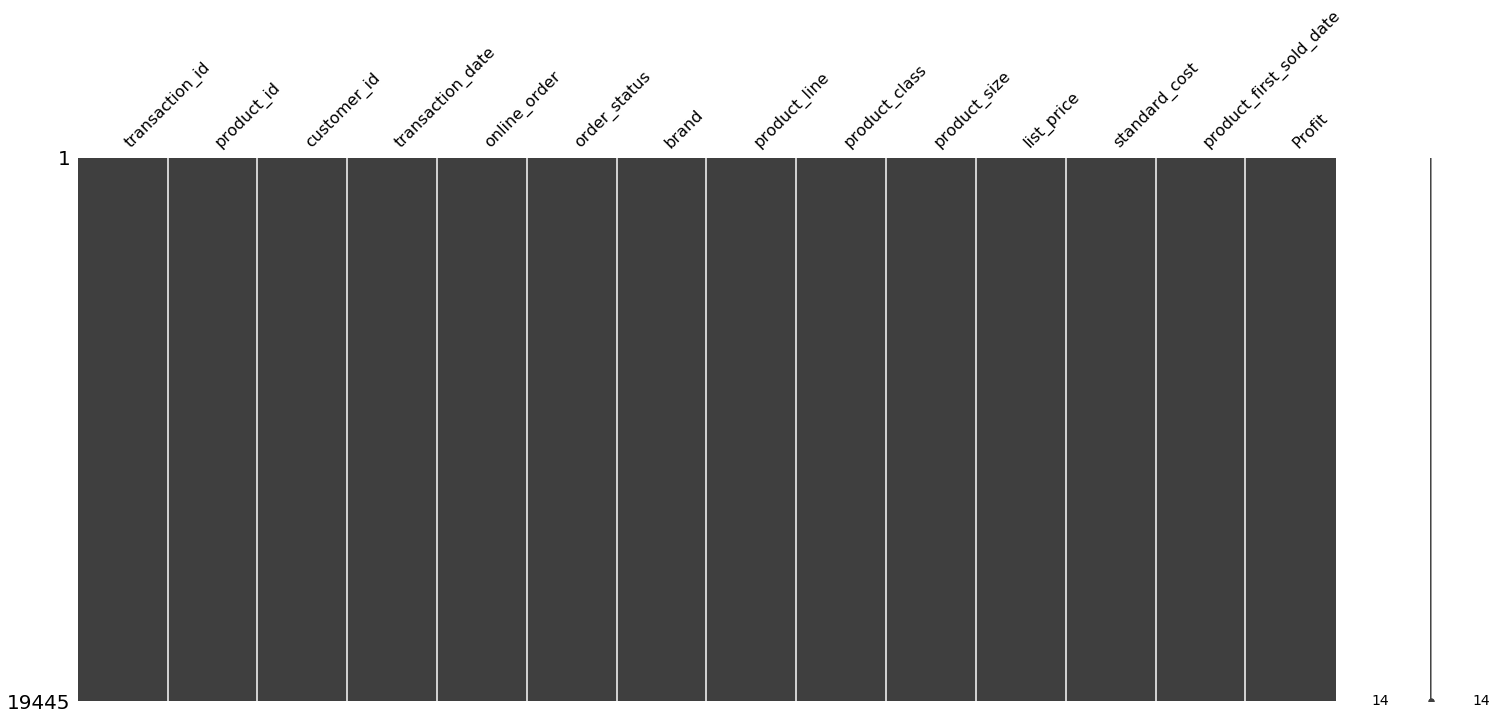

In [171]:
msno.matrix(Transactions_df)

# New Customer List Dataset

In [172]:
NewCustomerList_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
first_name                             1000 non-null object
last_name                              971 non-null object
gender                                 1000 non-null object
past_3_years_bike_related_purchases    1000 non-null int64
DOB                                    983 non-null datetime64[ns]
job_title                              894 non-null object
job_industry_category                  835 non-null object
wealth_segment                         1000 non-null object
deceased_indicator                     1000 non-null object
owns_car                               1000 non-null object
tenure                                 1000 non-null int64
address                                1000 non-null object
postcode                               1000 non-null int64
state                                  1000 non-null object
country                                1000 non-null 

## Removed the records contain null value in DOB and Job title

In [173]:
NewCustomerList_df = NewCustomerList_df.dropna(axis=0, subset=['DOB'])
NewCustomerList_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 999
Data columns (total 23 columns):
first_name                             983 non-null object
last_name                              954 non-null object
gender                                 983 non-null object
past_3_years_bike_related_purchases    983 non-null int64
DOB                                    983 non-null datetime64[ns]
job_title                              878 non-null object
job_industry_category                  818 non-null object
wealth_segment                         983 non-null object
deceased_indicator                     983 non-null object
owns_car                               983 non-null object
tenure                                 983 non-null int64
address                                983 non-null object
postcode                               983 non-null int64
state                                  983 non-null object
country                                983 non-null object
prope

In [174]:
NewCustomerList_df = NewCustomerList_df.dropna(axis=0, subset=['job_title'])
NewCustomerList_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 999
Data columns (total 23 columns):
first_name                             878 non-null object
last_name                              852 non-null object
gender                                 878 non-null object
past_3_years_bike_related_purchases    878 non-null int64
DOB                                    878 non-null datetime64[ns]
job_title                              878 non-null object
job_industry_category                  735 non-null object
wealth_segment                         878 non-null object
deceased_indicator                     878 non-null object
owns_car                               878 non-null object
tenure                                 878 non-null int64
address                                878 non-null object
postcode                               878 non-null int64
state                                  878 non-null object
country                                878 non-null object
prope

In [175]:
NewCustomerList_df[["number","street"]] = NewCustomerList_df.address.str.extract('(?P<number>\d+) (?P<street>.+)',expand=True)
NewCustomerList_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,number,street
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,6,0.70,0.8750,1.09375,0.929688,1,1,1.718750,45,Shopko Center
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,11,0.61,0.6100,0.76250,0.648125,1,1,1.718750,14,Mccormick Park
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,5,0.92,0.9200,0.92000,0.920000,1,1,1.718750,5,Colorado Crossing
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,1,0.57,0.7125,0.71250,0.712500,4,4,1.703125,207,Annamark Plaza
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,9,0.97,0.9700,1.21250,1.212500,4,4,1.703125,115,Montana Place


In [176]:
NewCustomerList_final_df= NewCustomerList_df
NewCustomerList_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 999
Data columns (total 25 columns):
first_name                             878 non-null object
last_name                              852 non-null object
gender                                 878 non-null object
past_3_years_bike_related_purchases    878 non-null int64
DOB                                    878 non-null datetime64[ns]
job_title                              878 non-null object
job_industry_category                  735 non-null object
wealth_segment                         878 non-null object
deceased_indicator                     878 non-null object
owns_car                               878 non-null object
tenure                                 878 non-null int64
address                                878 non-null object
postcode                               878 non-null int64
state                                  878 non-null object
country                                878 non-null object
prope

In [177]:
cols = [16,17,18,19,20]
NewCustomerList_final_df.drop(NewCustomerList_final_df.columns[cols],axis=1,inplace=True)
NewCustomerList_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 999
Data columns (total 20 columns):
first_name                             878 non-null object
last_name                              852 non-null object
gender                                 878 non-null object
past_3_years_bike_related_purchases    878 non-null int64
DOB                                    878 non-null datetime64[ns]
job_title                              878 non-null object
job_industry_category                  735 non-null object
wealth_segment                         878 non-null object
deceased_indicator                     878 non-null object
owns_car                               878 non-null object
tenure                                 878 non-null int64
address                                878 non-null object
postcode                               878 non-null int64
state                                  878 non-null object
country                                878 non-null object
prope

## Merging dataset

In [178]:
Transactions_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-10,110.56
1,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,2008-03-19,751.02
2,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21,189.28
3,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,2003-09-09,90.10
4,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09,17.87


In [179]:
Transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 14 columns):
transaction_id             19445 non-null int64
product_id                 19445 non-null int64
customer_id                19445 non-null int64
transaction_date           19445 non-null datetime64[ns]
online_order               19445 non-null float64
order_status               19445 non-null object
brand                      19445 non-null object
product_line               19445 non-null object
product_class              19445 non-null object
product_size               19445 non-null object
list_price                 19445 non-null float64
standard_cost              19445 non-null float64
product_first_sold_date    19445 non-null datetime64[ns]
Profit                     19445 non-null float64
dtypes: datetime64[ns](2), float64(4), int64(3), object(5)
memory usage: 2.2+ MB


In [180]:
CustomerDemographic_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
65,66,Anselm,Gawne,M,46,2002-03-11,Account Executive,Argiculture,High Net Worth,N,No,1.0,18.0
1249,1250,Jacklyn,Kewley,F,42,2001-11-02,Help Desk Technician,Manufacturing,Mass Customer,N,No,1.0,19.0
3172,3173,Angelo,-,M,55,2001-10-10,Computer Systems Analyst I,Health,Mass Customer,N,Yes,1.0,19.0
2758,2759,Melodee,Hendrik,F,16,2001-11-14,Operator,Health,Affluent Customer,N,Yes,1.0,19.0
1812,1813,Reeva,Eakeley,F,45,2001-05-19,Technical Writer,Manufacturing,Mass Customer,N,No,1.0,19.0


In [181]:
CustomerDemographic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3413 entries, 65 to 719
Data columns (total 13 columns):
customer_id                            3413 non-null int64
first_name                             3413 non-null object
last_name                              3413 non-null object
gender                                 3413 non-null object
past_3_years_bike_related_purchases    3413 non-null int64
DOB                                    3413 non-null datetime64[ns]
job_title                              3413 non-null object
job_industry_category                  2862 non-null object
wealth_segment                         3413 non-null object
deceased_indicator                     3413 non-null object
owns_car                               3413 non-null object
tenure                                 3413 non-null float64
Age                                    3413 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 373.3+ KB


In [182]:
Transactions_dum = Transactions_df
Transactions_dum.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-10,110.56
1,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,2008-03-19,751.02
2,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21,189.28
3,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,2003-09-09,90.10
4,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09,17.87


In [183]:
cutomer_transaction_df = pd.merge(CustomerDemographic_df, Transactions_df, how='outer', on='customer_id')
cutomer_transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19862 entries, 0 to 19861
Data columns (total 26 columns):
customer_id                            19862 non-null int64
first_name                             17135 non-null object
last_name                              17135 non-null object
gender                                 17135 non-null object
past_3_years_bike_related_purchases    17135 non-null float64
DOB                                    17135 non-null datetime64[ns]
job_title                              17135 non-null object
job_industry_category                  14397 non-null object
wealth_segment                         17135 non-null object
deceased_indicator                     17135 non-null object
owns_car                               17135 non-null object
tenure                                 17135 non-null float64
Age                                    17135 non-null float64
transaction_id                         19445 non-null float64
product_id                

In [184]:
cutomer_transaction_df.isna().sum()

customer_id                               0
first_name                             2727
last_name                              2727
gender                                 2727
past_3_years_bike_related_purchases    2727
DOB                                    2727
job_title                              2727
job_industry_category                  5465
wealth_segment                         2727
deceased_indicator                     2727
owns_car                               2727
tenure                                 2727
Age                                    2727
transaction_id                          417
product_id                              417
transaction_date                        417
online_order                            417
order_status                            417
brand                                   417
product_line                            417
product_class                           417
product_size                            417
list_price                      

In [185]:
cutomer_transaction_dum = cutomer_transaction_df[cutomer_transaction_df.first_name.notnull()]
cutomer_transaction_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17135 entries, 0 to 17134
Data columns (total 26 columns):
customer_id                            17135 non-null int64
first_name                             17135 non-null object
last_name                              17135 non-null object
gender                                 17135 non-null object
past_3_years_bike_related_purchases    17135 non-null float64
DOB                                    17135 non-null datetime64[ns]
job_title                              17135 non-null object
job_industry_category                  14397 non-null object
wealth_segment                         17135 non-null object
deceased_indicator                     17135 non-null object
owns_car                               17135 non-null object
tenure                                 17135 non-null float64
Age                                    17135 non-null float64
transaction_id                         16718 non-null float64
product_id                

In [186]:
cutomer_transaction_dum = cutomer_transaction_dum[cutomer_transaction_dum.transaction_date.notnull()]
cutomer_transaction_dum.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,66,Anselm,Gawne,M,46.0,2002-03-11,Account Executive,Argiculture,High Net Worth,N,...,0.0,Approved,Trek Bicycles,Standard,low,medium,1057.51,154.40,1994-07-12,903.11
1,66,Anselm,Gawne,M,46.0,2002-03-11,Account Executive,Argiculture,High Net Worth,N,...,1.0,Approved,Solex,Standard,low,medium,945.04,507.58,1995-12-19,437.46
2,66,Anselm,Gawne,M,46.0,2002-03-11,Account Executive,Argiculture,High Net Worth,N,...,1.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61
3,66,Anselm,Gawne,M,46.0,2002-03-11,Account Executive,Argiculture,High Net Worth,N,...,0.0,Cancelled,Solex,Standard,low,medium,1289.85,74.51,2007-12-11,1215.34
4,66,Anselm,Gawne,M,46.0,2002-03-11,Account Executive,Argiculture,High Net Worth,N,...,1.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,2016-11-14,448.68


In [187]:
import datetime
cutomer_transaction_dum = cutomer_transaction_dum.sort_values(by ='transaction_date' )
cutomer_transaction_dum['transaction_date'].tail()
last_day = datetime.datetime(2017, 12, 30)

In [188]:
cutomer_transaction_dum['Recency'] = (last_day - cutomer_transaction_dum['transaction_date'])
cutomer_transaction_dum.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit,Recency
10816,1935,Galvan,-,M,72.0,1974-11-13,Senior Sales Associate,NaN,Mass Customer,N,...,Approved,Solex,Standard,high,medium,1024.66,614.80,1996-11-09,409.86,363 days
401,1229,Sebastian,Trass,M,38.0,2000-01-08,GIS Technical Architect,Manufacturing,Affluent Customer,N,...,Approved,WeareA2B,Road,low,small,1172.78,1043.77,1991-05-06,129.01,363 days
3290,1022,Suzann,Wilks,F,56.0,1990-03-04,Assistant Manager,Financial Services,Affluent Customer,N,...,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1999-07-26,1702.55,363 days
8959,2011,Guthrie,MacAne,M,68.0,1978-01-22,VP Sales,Manufacturing,High Net Worth,N,...,Approved,Trek Bicycles,Road,medium,medium,290.62,215.14,2015-08-02,75.48,363 days
16006,311,Jaimie,Halms,F,86.0,1957-08-16,Internal Auditor,Health,High Net Worth,N,...,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,2011-05-09,1660.88,363 days


In [189]:
cutomer_transaction_bf_RMF = pd.pivot_table(data=cutomer_transaction_dum, index=['customer_id'], values=['Recency', 'product_id','Profit'], aggfunc={'Recency': 'min', 'product_id': 'size', 'Profit': 'sum'}).reset_index().rename(columns={'Recency': 'Min_Recency', 'product_id': 'count_product_id', 'Profit': 'sum_Profit'})

# RFM calculate

In [190]:
cutomer_transaction_bf_RMF.head()

,customer_id,sum_Profit,Min_Recency,count_product_id
0,1,3018.09,7 days,11
1,2,2226.26,128 days,3
2,3,3290.21,102 days,7
3,5,2394.94,16 days,6
4,8,5364.39,22 days,9


In [191]:
cutomer_transaction_bf_RMF.describe()

,customer_id,sum_Profit,Min_Recency,count_product_id
count,2996.000000,2996.000000,2996,2996.000000
mean,1736.896195,3079.819122,62 days 21:38:12.656875,5.580107
std,1004.077184,1755.834196,59 days 18:49:09.812604,2.291872
min,1.000000,15.080000,0 days 00:00:00,1.000000
25%,872.750000,1801.035000,18 days 00:00:00,4.000000
50%,1738.500000,2808.665000,45 days 00:00:00,5.000000
75%,2593.250000,4114.367500,88 days 00:00:00,7.000000
max,3497.000000,11668.950000,353 days 00:00:00,14.000000


In [192]:
cutomer_transaction_RMF = cutomer_transaction_bf_RMF
cutomer_transaction_bf_RMF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996 entries, 0 to 2995
Data columns (total 4 columns):
customer_id         2996 non-null int64
sum_Profit          2996 non-null float64
Min_Recency         2996 non-null timedelta64[ns]
count_product_id    2996 non-null int64
dtypes: float64(1), int64(2), timedelta64[ns](1)
memory usage: 93.8 KB


In [193]:
one = datetime.timedelta(days=88)
two = datetime.timedelta(days=45)
three = datetime.timedelta(days=18)

In [194]:
# create a list of our conditions
conditions = [
    (cutomer_transaction_bf_RMF['Min_Recency'] > one),
    ((cutomer_transaction_bf_RMF['Min_Recency'] > two) & (cutomer_transaction_bf_RMF['Min_Recency'] <= one)),
    ((cutomer_transaction_bf_RMF['Min_Recency'] > three) & (cutomer_transaction_bf_RMF['Min_Recency'] <= two)),
    (cutomer_transaction_bf_RMF['Min_Recency'] <= three)
    ]

# create a list of the values we want to assign for each condition
values = ['1', '2', '3', '4']

# create a new column and use np.select to assign values to it using our lists as arguments
cutomer_transaction_RMF['R_score'] = np.select(conditions, values)

# display updated DataFrame
cutomer_transaction_RMF.head()

,customer_id,sum_Profit,Min_Recency,count_product_id,R_score
0,1,3018.09,7 days,11,4
1,2,2226.26,128 days,3,1
2,3,3290.21,102 days,7,1
3,5,2394.94,16 days,6,4
4,8,5364.39,22 days,9,3


In [195]:
# create a list of our conditions
conditions = [
    (cutomer_transaction_bf_RMF['count_product_id'] > 7),
    ((cutomer_transaction_bf_RMF['count_product_id'] > 5) & (cutomer_transaction_bf_RMF['count_product_id'] <= 7)),
    ((cutomer_transaction_bf_RMF['count_product_id'] > 4) & (cutomer_transaction_bf_RMF['count_product_id'] <= 5)),
    (cutomer_transaction_bf_RMF['count_product_id'] <= 4)
    ]

# create a list of the values we want to assign for each condition
values = ['4', '3', '2', '1']

# create a new column and use np.select to assign values to it using our lists as arguments
cutomer_transaction_RMF['F_score'] = np.select(conditions, values)

# display updated DataFrame
cutomer_transaction_RMF.head()

,customer_id,sum_Profit,Min_Recency,count_product_id,R_score,F_score
0,1,3018.09,7 days,11,4,4
1,2,2226.26,128 days,3,1,1
2,3,3290.21,102 days,7,1,3
3,5,2394.94,16 days,6,4,3
4,8,5364.39,22 days,9,3,4


In [196]:
# create a list of our conditions
conditions = [
    (cutomer_transaction_bf_RMF['sum_Profit'] > 4114.3),
    ((cutomer_transaction_bf_RMF['sum_Profit'] > 2808.6) & (cutomer_transaction_bf_RMF['sum_Profit'] <= 4114.3)),
    ((cutomer_transaction_bf_RMF['sum_Profit'] > 1801.03) & (cutomer_transaction_bf_RMF['sum_Profit'] <= 2808.6)),
    (cutomer_transaction_bf_RMF['sum_Profit'] <= 15.08)
    ]

# create a list of the values we want to assign for each condition
values = ['4', '3', '2', '1']

# create a new column and use np.select to assign values to it using our lists as arguments
cutomer_transaction_RMF['M_score'] = np.select(conditions, values)

# display updated DataFrame
cutomer_transaction_RMF.head()

,customer_id,sum_Profit,Min_Recency,count_product_id,R_score,F_score,M_score
0,1,3018.09,7 days,11,4,4,3
1,2,2226.26,128 days,3,1,1,2
2,3,3290.21,102 days,7,1,3,3
3,5,2394.94,16 days,6,4,3,2
4,8,5364.39,22 days,9,3,4,4


In [197]:
cutomer_transaction_RMF['RFM_Score'] = cutomer_transaction_RMF.R_score.map(str)  + cutomer_transaction_RMF.F_score.map(str) + cutomer_transaction_RMF.M_score.map(str)
cutomer_transaction_RMF.head()

,customer_id,sum_Profit,Min_Recency,count_product_id,R_score,F_score,M_score,RFM_Score
0,1,3018.09,7 days,11,4,4,3,443
1,2,2226.26,128 days,3,1,1,2,112
2,3,3290.21,102 days,7,1,3,3,133
3,5,2394.94,16 days,6,4,3,2,432
4,8,5364.39,22 days,9,3,4,4,344


# Categorise Customer based on RFM Score

In [198]:
cutomer_transaction_RMF[["sum_Profit"]].info()
cutomer_transaction_RMF["RFM_Score"] = cutomer_transaction_RMF["RFM_Score"].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996 entries, 0 to 2995
Data columns (total 1 columns):
sum_Profit    2996 non-null float64
dtypes: float64(1)
memory usage: 23.5 KB


In [199]:
cutomer_transaction_RMF[["RFM_Score"]].describe()

,RFM_Score
count,2996.000000
mean,276.946262
std,116.290613
min,110.000000
25%,210.000000
50%,310.000000
75%,410.000000
max,444.000000


In [200]:
110,210,310,410,444

(110, 210, 310, 410, 444)

In [201]:
# create a list of our conditions
conditions = [
    (cutomer_transaction_RMF['RFM_Score'] > 410),
    ((cutomer_transaction_RMF['RFM_Score'] > 310) & (cutomer_transaction_RMF['RFM_Score'] <= 410)),
    ((cutomer_transaction_RMF['RFM_Score'] > 210) & (cutomer_transaction_RMF['RFM_Score'] <= 310)),
    (cutomer_transaction_RMF['RFM_Score'] <= 210)
    ]

# create a list of the values we want to assign for each condition
values = ['Platinum', 'Gold', 'Silver', 'Bronze']
    
# create a new column and use np.select to assign values to it using our lists as arguments
cutomer_transaction_RMF['Customer Title'] = np.select(conditions, values)

# display updated DataFrame
cutomer_transaction_RMF.head()

,customer_id,sum_Profit,Min_Recency,count_product_id,R_score,F_score,M_score,RFM_Score,Customer Title
0,1,3018.09,7 days,11,4,4,3,443,Platinum
1,2,2226.26,128 days,3,1,1,2,112,Bronze
2,3,3290.21,102 days,7,1,3,3,133,Bronze
3,5,2394.94,16 days,6,4,3,2,432,Platinum
4,8,5364.39,22 days,9,3,4,4,344,Gold


In [202]:
cutomer_transaction_RMF.to_csv('Customer Transaction Final.csv', index = False)

In [203]:
cutomer_transaction_dum.to_csv('Customer Transaction.csv', index = False)